#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [517]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import widgets, interact

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


### Data Exploration

In [518]:
print(f"Dataset columns: \n{list(df.columns)}")

Dataset columns: 
['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency', 'Status']


In [519]:
# Dataset dimensions
print(f"The dataset consists of {df.shape[0]} rows and {df.shape[1]} columns")

The dataset consists of 148654 rows and 13 columns


In [520]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


- Our dataset seems to have some missing values especially in the 'Notes' and 'Status' columns as they are all zeros.
- The data types of the columns seems good but the 'Notes' and 'Status' columns are not right.

In [521]:
# Showing the main charactaristics of each column in the dataset excluding 'Notes', 'Status' cause they have all nulls
@interact(column = df.drop(columns = ['Notes', 'Status']).columns)
def column_info(column):
    print("*" * 10, column, "*" * 10)
    display(df[column].value_counts())
    print("-" * 30)
    display(df[column].describe())
    print("=" * 40)

interactive(children=(Dropdown(description='column', options=('Id', 'EmployeeName', 'JobTitle', 'BasePay', 'Ov…

- The payement columns seems to have some negative values that we need to handle.
- The 'Year' column has values that doesn't seem to be years 
- The range of the numerical values seems reasonable.

In [522]:
# Exploring the missing values in the data 
print(f"Number of Missing values in each column:\n{df.isnull().sum()}")

Number of Missing values in each column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


- As we can see the column ['Status', 'Notes'] has 100% null values so we will remove those colums as they won't provide us with any information. 

### Data Cleaning 

In [523]:
# Dropping the two columns
df.drop(columns  = ['Status', 'Notes'], inplace = True)
# Showing the Dataset information after dropping the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Agency            148654 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 12.5+ MB


##### Handling the negative values in the payment columns

In [524]:
# Filering the null values from the data
df = df.loc[~(df[df.select_dtypes("number").columns] < 0).any(axis=1)]
# Showing the statistical values of each column in the data.
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148633.000000,148027.000000,148629.000000,148629.000000,112470.000000,148633.000000,148633.000000,148633.000000
mean,74325.229613,66331.428168,5066.750620,3649.257616,25011.525799,74776.758227,93702.880330,2012.522636
std,42914.584650,42762.323488,11455.040983,8057.002045,15400.558302,50514.358835,62790.060508,1.117589
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000
25%,37159.000000,33599.910000,0.000000,0.000000,11546.870000,36178.330000,44097.080000,2012.000000
50%,74328.000000,65010.820000,0.000000,812.120000,28629.855000,71430.240000,92409.150000,2013.000000
75%,111494.000000,94691.060000,4658.830000,4237.140000,35568.720000,105846.070000,132881.790000,2014.000000
max,148653.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


##### Handling missing values in the payment columns

In [525]:
# Filling the null values in ['OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits'] columns 
df[payment_cols[1:]] = df[payment_cols[1:]].fillna(0)
# Calculate the null values in 'BasePay' based on the the values of other payment features  
df['BasePay'].fillna(df['TotalPay'] - (df['OtherPay'] + df['OvertimePay']), inplace=True)
# Filtering the 'BasePay' That are less than 1000
df = df[df['BasePay'] >= 1000]

- Filling the null values in the payment columns with '0' except the 'BasePay' column.
- As we will use the other columns to compute the null values by subtracting the other extras from the total pay to get the missing base pay.
- Filtering the BasePay to be higher than 1000 to be reasonable.

In [526]:
# Checking the null values after handling it.
print(f'Number of null values after cleaning:\n{df.isnull().sum()}')

Number of null values after cleaning:
Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64


### Data Analysis 

In [527]:
# Plotting the histogram of each numerical column in the data 
@interact(column = df.drop("Id", axis = 1).select_dtypes("number").columns)
def plot_histogram(column):
    plt.figure(figsize=(12, 8))  # Set the figure size here
    sns.histplot(x = df[column], palette = "magma")
    plt.title(f'{column} Histogram')
    plt.show()

interactive(children=(Dropdown(description='column', options=('BasePay', 'OvertimePay', 'OtherPay', 'Benefits'…

In [536]:
# Plotting the histogram of each numerical column in the data 
@interact(column = df.drop("Id", axis = 1).select_dtypes("number").columns)
def plot_histogram(column):
    plt.figure(figsize=(12, 8))  # Set the figure size here
    sns.boxplot(x = df[column], palette = "magma")
    plt.title(f'{column} Histogram')
    plt.show()

interactive(children=(Dropdown(description='column', options=('BasePay', 'OvertimePay', 'OtherPay', 'Benefits'…

- There is some big ranges in the payment columns but it's rational cause the data has many job titles with different work and salaries

#### Which year has the highest TotalPayBenefits ?

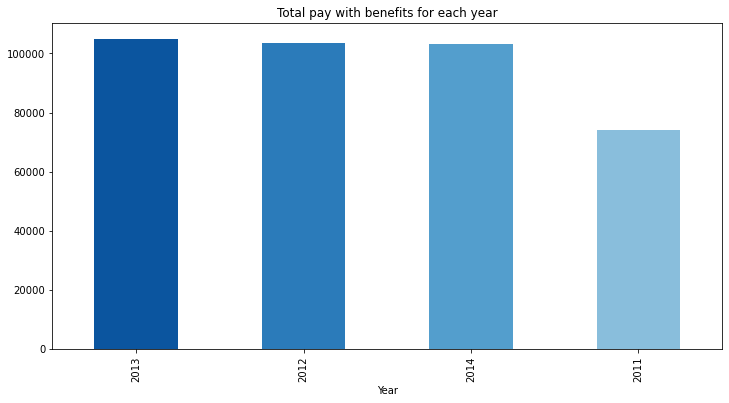

In [529]:
# Grouping each year with its average 'TotalPayBenefits'
year_df = df.groupby("Year")['TotalPayBenefits'].mean().sort_values(ascending = False)
# Bar plot to illustrate the difference between years
year_df.plot.bar(figsize = (12, 6),
                 title = "Total pay with benefits for each year",
                 color = sns.color_palette("Blues_r"));

- The year '2013' has the highest 'BarePay' between the years

#### What are the agencies in our data ?

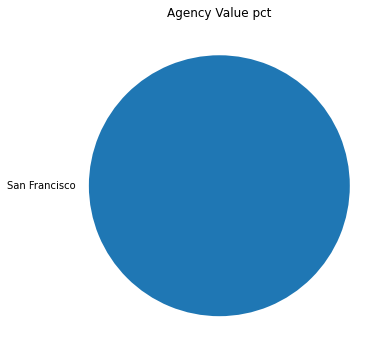

In [530]:
# Setting the figure size
plt.figure(figsize = (12, 6))
# Constructing a pie plot for the agency values
plt.pie(df['Agency'].value_counts(), labels = df['Agency'].value_counts().index);
# Setting a title for the chart 
plt.title("Agency Value pct");

- We can see that the 'Agency' column has only one value 'San Francisco'

#### Is there a relationship between the 'BasePay' of the employer and his 'Benefits' ?

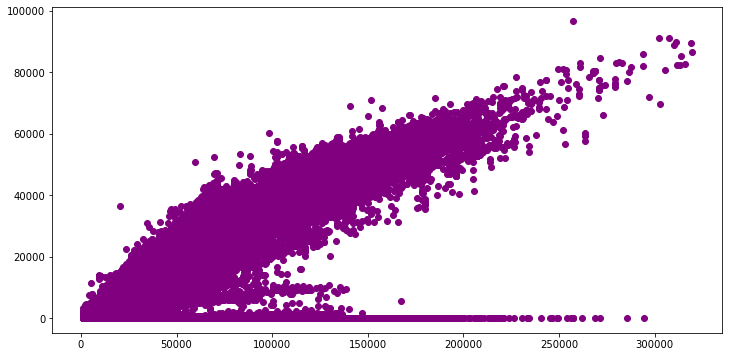

In [531]:
# Setting the figure size
plt.figure(figsize = (12, 6))
plt.scatter(df['BasePay'], df['Benefits'], color = "purple");

- It seems that they have a strong positive relation that the Higher payed employers seems to be better at work

#### Is there a relation between 'OvertimePay' and the 'TotalPayBenefits' ?

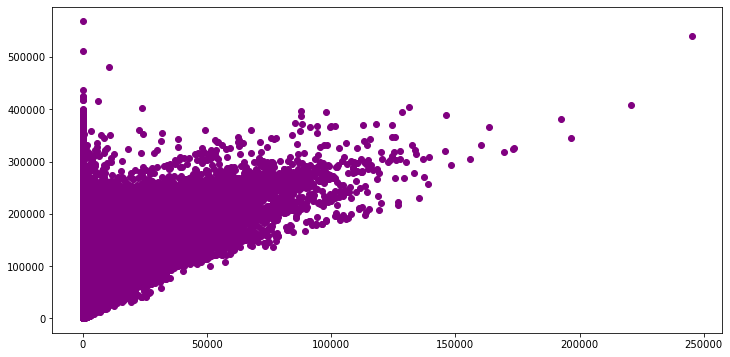

In [532]:
# Setting the figure size
plt.figure(figsize = (12, 6))
plt.scatter(df['OvertimePay'], df['TotalPayBenefits'], color = "purple");

- There is a fairly good relation between the 'OvertimePay' and the 'TotalPayBenefits' so we can conclude that the employers that works more overtime gets better benefits 

#### What is the job title that has the highest Total payment ?

In [533]:
# Grouping each job title with its average total pay and sorting it to get the highest on top.
job_df = df.groupby("JobTitle")[payment_cols].mean().sort_values(by = "TotalPay", ascending = False)
job_df.head(10)

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
JobTitle,,,,,,
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,199119.150000,0.000000,200092.125000,0.000000,399211.275000,399211.275000
Chief Investment Officer,257340.000000,0.000000,82313.700000,96570.660000,339653.700000,436224.360000
Chief of Police,309767.683333,0.000000,19415.963333,82548.620000,329183.646667,411732.266667
"Chief, Fire Department",304232.340000,0.000000,21739.343333,82893.643333,325971.683333,408865.326667
DEPUTY DIRECTOR OF INVESTMENTS,256576.960000,0.000000,51322.500000,0.000000,307899.460000,307899.460000
"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.000000,0.000000,17115.730000,0.000000,302377.730000,302377.730000
"Gen Mgr, Public Trnsp Dept",297769.413333,0.000000,0.000000,82927.026667,297769.413333,380696.440000
Asst Chf of Dept (Fire Dept),208249.661111,46024.222222,27489.600556,60834.066667,281763.483889,342597.550556
"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",199852.653333,4605.000000,74901.906667,0.000000,279359.560000,279359.560000


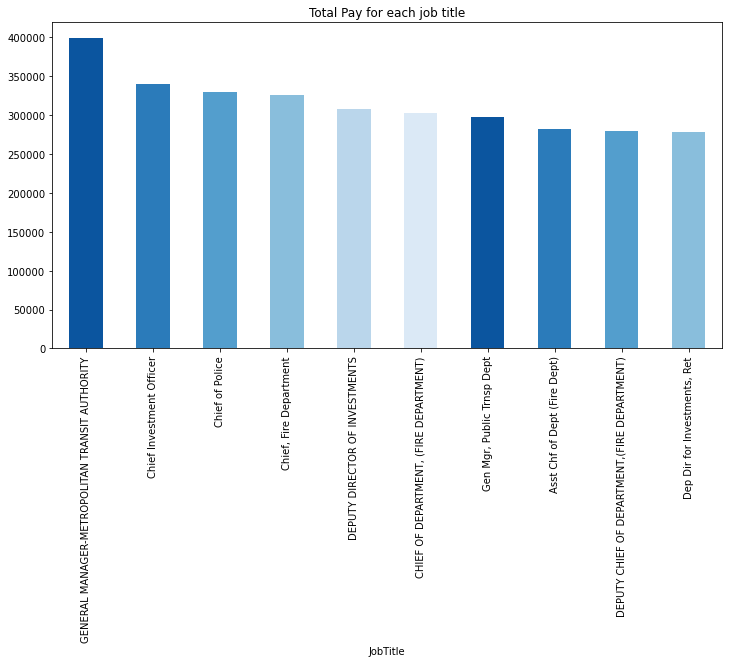

In [534]:
# Shwoing the top 10 job titles that have the highest total pay.
job_df['TotalPay'].head(10).plot.bar(figsize = (12, 6),
                                     title = "Total Pay for each job title",
                                     color = sns.color_palette("Blues_r"));

- We can see that the 'Chief Investment Officer' has the highest total pay and generally the chiefs in the organization has the highest total pay.

### Correlation Analysis

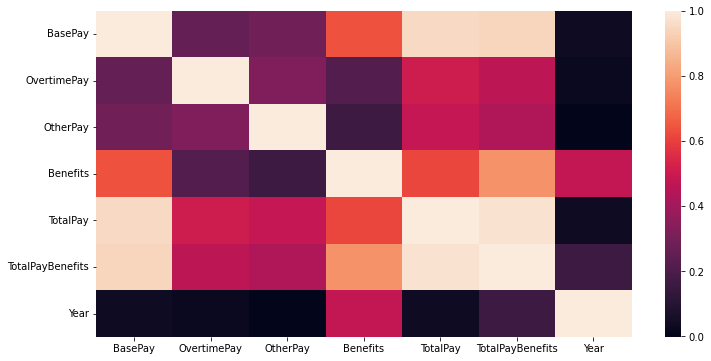

In [535]:
plt.figure(figsize = (12, 6))
# Making a heatmao that shows the correlation between the numerical columns
sns.heatmap(df.drop("Id", axis = 1).corr());

- We can see that there is a good correlation between the 'TotalPay' and the ['BasePay', 'OvertimePay', 'Benefits'] 
- There is a low correlation between the 'Benefits' & 'OtherPay' and 'Benefits' & 'OvertimePay' but a good one with 'BasePay' 

# Good Luck!